In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
# Set Random Seed
seed = np.random.seed(2024)
sns.set_theme(context = 'paper')
# 1. darkolivegreen
# 2. olive
# 3. darkkhaki
# 4. yellowgreen
# 5. olivedrab

### <span style="color: darkkhaki;"> 

# <span style="color: darkolivegreen;"> Credit Card Fraud Detection</span>

**<span style="color: olive;">Objective**

**<span style="color: olive;">Project Pipeline**
- Import and understand the fraud data
- See if the data has any shortcomings like missing data or imbalance, and then fix them
- Train models on the data using K-Fold Cross Validation
- Evaluate the performance of the models using various metrics
- Rank the model based on their performance and visualize the results

**<span style="color: olive;">i. Data Exploring**
    
**<span style="color: olive;">ii. Pre-processing**

**<span style="color: olive;">iii. Training models**

**<span style="color: olive;">iv. Evaluation**

## <span style="color: olive;">Objective
### <span style="color: darkkhaki;">Credit Card Fraud 
Credit card fraud is the unauthorized use of a credit card to make purchases or withdraw funds.
### <span style="color: darkkhaki;">Source 
The dataset contains transactions made by credit cards in September 2013 by European cardholders, and also available in Kaggle.
### <span style="color: darkkhaki;">Objective
to detect fraudulent credit card transactions or not based on synthetic features

## <span style="color: olive;">i. Data Exploring
- It contains only numerical input variables which are the result of a PCA transformation. 
- There are a total of 31 features in the dataset.
    - `V1, V2, … V28` are the principal components obtained with PCA
    - `Time` contains the seconds elapsed between each transaction and the first transaction in the dataset.
    - `Amount` is the transaction Amount
    - Target: `Class` 1 in case of fraud and 0 otherwise.
### <span style="color: darkkhaki;">a. Load the dataset

In [2]:
df = pd.read_csv('creditcard.csv')
display(df.head())
print('Number column of the dataset:', df.shape[0])
print('Number row of the dataset:', df.shape[1])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Number column of the dataset: 284807
Number row of the dataset: 31


### <span style="color: darkkhaki;"> b. Data Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### <span style="color: darkkhaki;"> c. Class Distribution

In [4]:
class_counts = df['Class'].value_counts()
display(class_counts)

Class
0    284315
1       492
Name: count, dtype: int64

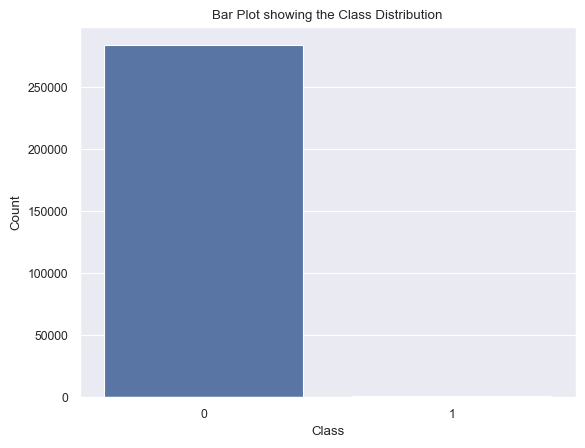

In [5]:
sns.barplot(x=class_counts.index, y=class_counts.values);
plt.title('Bar Plot showing the Class Distribution');
plt.xlabel('Class');
plt.ylabel('Count');

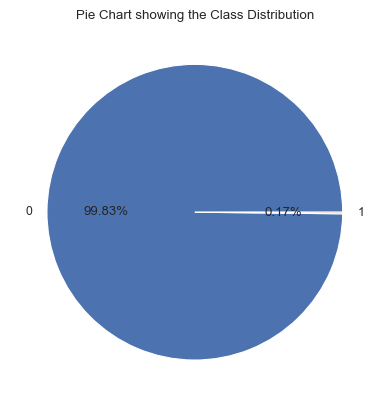

In [6]:
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%');
plt.title('Pie Chart showing the Class Distribution');

As we can see, the dataset is very imbalanced as most of the transaction are **Non-Fraud**. Use this dataset for predictive models might cause a lot of errors because the models will tend to overfit since it gonna assume the most transactions are Non-Fraud

# <span style="color: olive;"> ii. Pre-processing
## <span style="color: darkkhaki;"> 1. Data Cleaning (Outlier Detection) 
### <span style="color: yellowgreen;"> a. Check for `Null` value

In [7]:
# CHECK
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### <span style="color: yellowgreen;"> b. Check for Duplicates

In [8]:
# CHECK
df.duplicated().sum()

1081

There are 1081 duplicated rows in the dataset. Duplicate rows can skew the analysis and the results of the model trainning, as they can introduce bias and potentially lead to overfitting.
Removing duplicates is generally a good practice in data preprocessing, especially in a sensitive task like fraud detection where accuracy is critical. So, I am gonna remove that.

In [9]:
# Remove the Duplicate Rows
df = df.drop_duplicates()
# Verify the number of rows after removing duplicates
print('Number of rows after removing duplicates:',df.shape[0])

Number of rows after removing duplicates: 283726


In [10]:
class_counts = df['Class'].value_counts()
display(class_counts)

Class
0    283253
1       473
Name: count, dtype: int64

## <span style="color: darkkhaki;"> 2. Data Transformation
### <span style="color: yellowgreen;"> a. Variable Scaling
https://hersanyagci.medium.com/feature-scaling-with-scikit-learn-for-data-science-8c4cbcf2daff
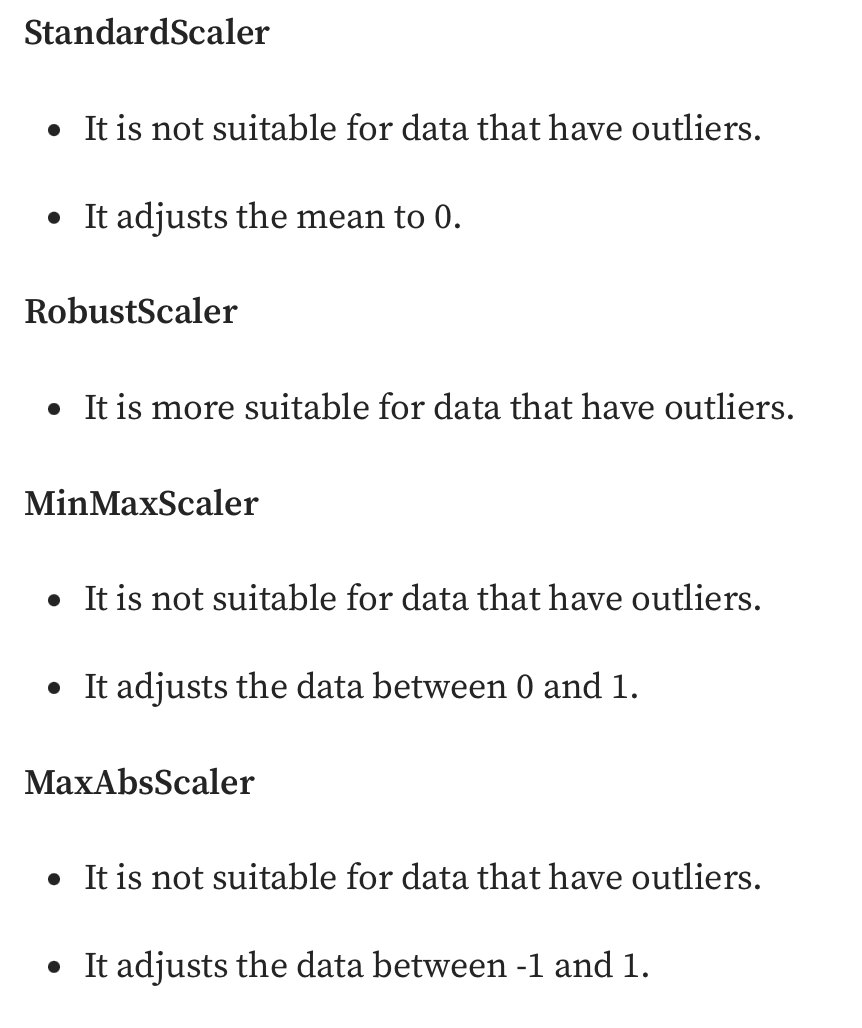
### Plot the distribution of Transaction `Amount` and `Time`    

/var/folders/3v/hv8gygz544x36c5wqqmmn5c80000gn/T/ipykernel_9369/2576472095.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'], ax=axes[0])
/var/folders/3v/hv8gygz544x36c5wqqmmn5c80000gn/T/ipykernel_9369/2576472095.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'], ax=a

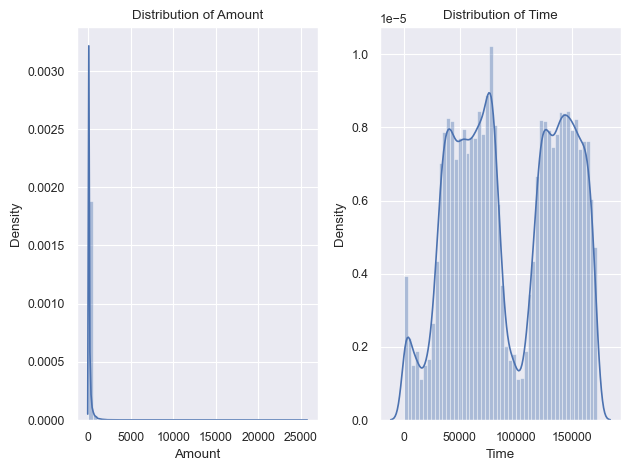

In [11]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2)  # Adjust figsize as needed

# Plot the distribution of 'Amount' on the first subplot
sns.distplot(df['Amount'], ax=axes[0])
axes[0].set_title('Distribution of Amount')

# Plot the distribution of 'Time' on the second subplot
sns.distplot(df['Time'], ax=axes[1])
axes[1].set_title('Distribution of Time')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Box Plot of  Transaction `Amount` and `Time` 

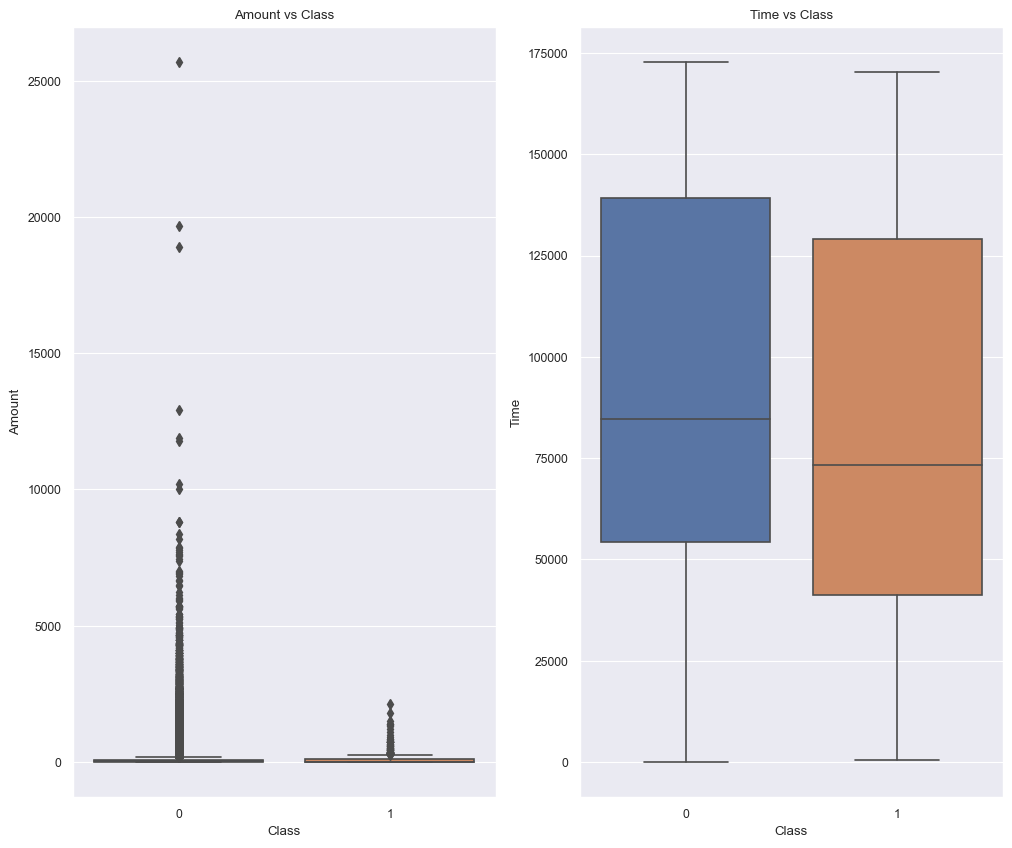

In [12]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
## Boxplot of 'Amount' vs 'Class'
sns.boxplot(data=df, x='Class', y='Amount', ax=axes[0])
axes[0].set_title('Amount vs Class');
## Boxplot of 'Time' vs 'Class'
sns.boxplot(data=df, x='Class', y='Time', ax=axes[1])
axes[1].set_title('Time vs Class');

### Scaling Transaction `Amount`
https://hersanyagci.medium.com/detecting-and-handling-outliers-with-pandas-7adbfcd5cad8

`Amount` is not normally distributed. So I either do `RobustScaler` or `Log Transformation`

Im choosing `Log Transformation` in this case as Applying a logarithmic transformation can help in reducing the skewness of the distribution. This can be particularly useful if your transaction amounts span several orders of magnitude.

/var/folders/3v/hv8gygz544x36c5wqqmmn5c80000gn/T/ipykernel_9369/4017627355.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_scaled['Amount_scaled'].values);


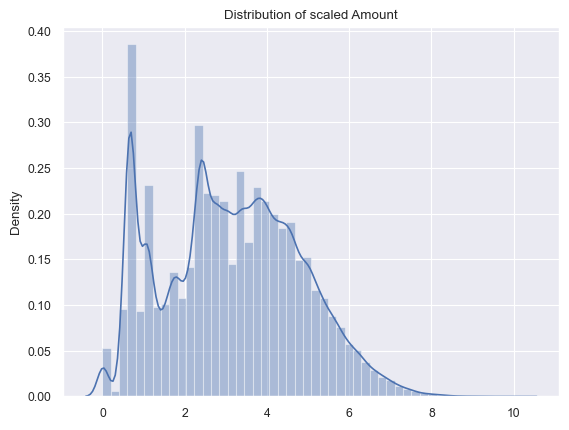

In [13]:
df_scaled = df.copy()

df_scaled['Amount_scaled'] = np.log1p(df_scaled['Amount'])  # log1p is used to avoid log(0)
sns.distplot(df_scaled['Amount_scaled'].values);
plt.title('Distribution of scaled Amount');

### Scaling Transaction `Time`
Transaction Time often represents the time elapsed since a reference point (e.g., the start of data collection). It's a continuous variable, and its distribution can vary significantly.
We can use `StandardScaler` or `MinMaxScaler`:
- `StandardScaler`: This scaler standardizes features by removing the mean and scaling to unit variance. It's useful if the transaction times are normally distributed.
- `MinMaxScaler`: This scaler scales features to a range, typically between 0 and 1. It's useful if the transaction times have a known range or if we want to normalize the time values.

Im choosing `StandardScaler` in this case as the `Time` is not really skewed.

/var/folders/3v/hv8gygz544x36c5wqqmmn5c80000gn/T/ipykernel_9369/3357283373.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_scaled['Time_scaled'].values);


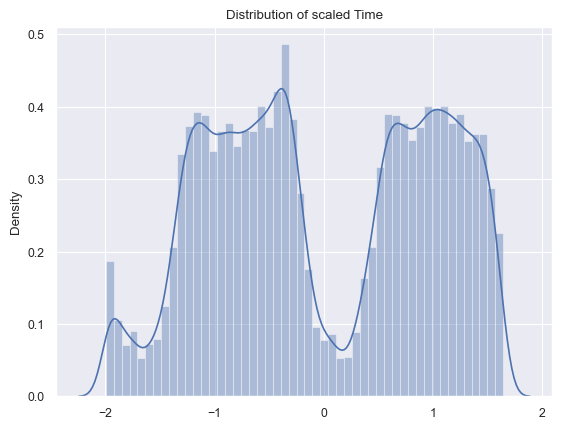

In [14]:
## StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled['Time_scaled'] = scaler.fit_transform(df_scaled[['Time']])

sns.distplot(df_scaled['Time_scaled'].values);
plt.title('Distribution of scaled Time');

### Box Plot of  Transaction `Amount_scaled` and `Time_scaled` 

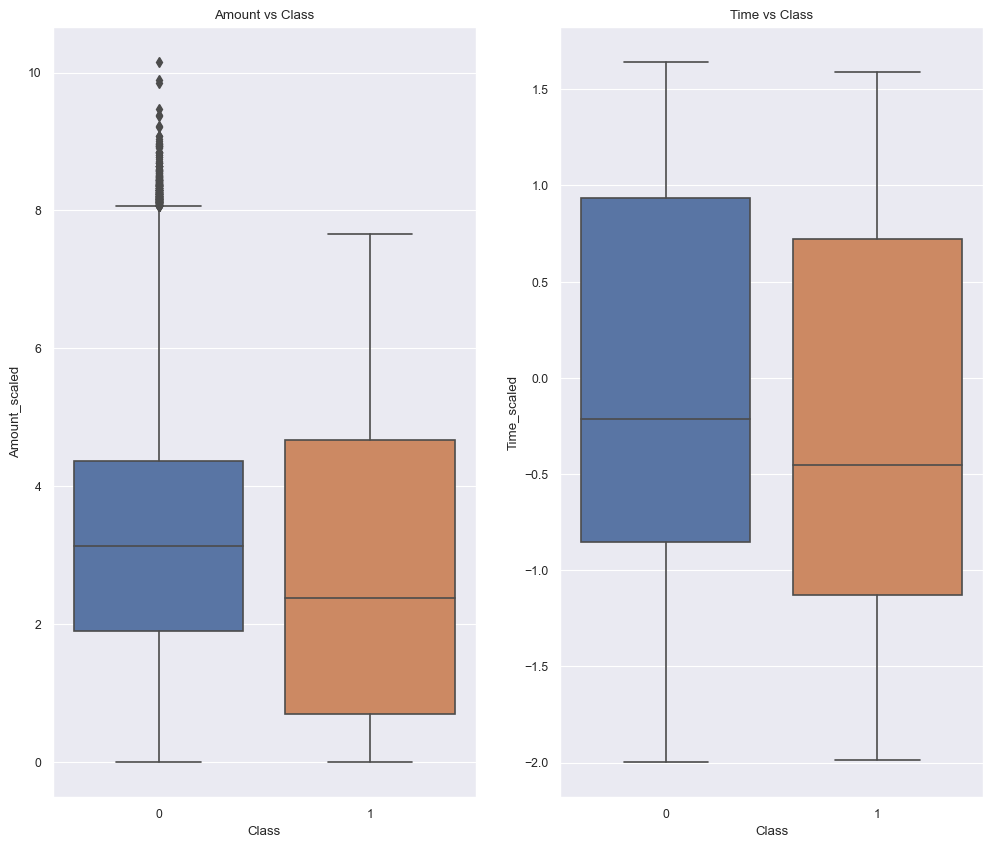

In [15]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
## Boxplot of 'Amount_scaled' vs 'Class'
sns.boxplot(data=df_scaled, x='Class', y='Amount_scaled', ax=axes[0])
axes[0].set_title('Amount vs Class');
## Boxplot of 'Time_scaled' vs 'Class'
sns.boxplot(data=df_scaled, x='Class', y='Time_scaled', ax=axes[1])
axes[1].set_title('Time vs Class');

There are still some outliers in `Amount_scaled` after scaling, but I decide not to dropping outliers based on the context of the analysis.

The outliers in the `Non-Fraud` class, so it kinda make sense and it might be **True Outliers** as the outliers are true reflections of the underlying population (e.g., rare but legitimate high-value transactions) => We might not want to remove the,, as they provide valuable information

### Check the new scaled dataset

In [16]:
display(df_scaled.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_scaled,Time_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.014760,-1.996823
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.305626,-1.996823
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.939276,-1.996802
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.824306,-1.996802
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.262539,-1.996781


### Remove Unscaled variables: `Amount` and `Time`

In [17]:
df_scaled.drop(['Time', 'Amount'], axis=1, inplace=True)
df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_scaled,Time_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.014760,-1.996823
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1.305626,-1.996823
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.939276,-1.996802
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.824306,-1.996802
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.262539,-1.996781


## <span style="color: darkkhaki;"> 3. Data Reduction
### Split the data

In [18]:
from sklearn.model_selection import train_test_split
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=seed)

In [19]:
print('Class Distribution (Training set)', y_train.value_counts())
print('\nClass Distribution (Test set)', y_test.value_counts())

Class Distribution (Training set) Class
0    226609
1       371
Name: count, dtype: int64

Class Distribution (Test set) Class
0    56644
1      102
Name: count, dtype: int64


### <span style="color: yellowgreen;"> a. Resampling (Imbalanced data) 
https://hersanyagci.medium.com/random-resampling-methods-for-imbalanced-data-with-imblearn-1fbba4a0e6d3
    
 <span style="color: red;"> Apply on the **Training data only**    

https://imbalanced-learn.org/stable/references/under_sampling.html
    
https://hersanyagci.medium.com/under-sampling-methods-for-imbalanced-data-clustercentroids-randomundersampler-nearmiss-eae0eadcc145
    
https://imbalanced-learn.org/stable/auto_examples/under-sampling/plot_comparison_under_sampling.html#sphx-glr-auto-examples-under-sampling-plot-comparison-under-sampling-py
    


### `Pipeline` (combine Oversampling and Undersampling)
https://hersanyagci.medium.com/random-resampling-methods-for-imbalanced-data-with-imblearn-1fbba4a0e6d3

`RandomOverSampler(0.1)` : 0.1 * majority class
`RandomUnderSampler(0.5)` : 2 * minority class

In [20]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

OVER = RandomOverSampler(sampling_strategy=0.1, random_state=seed)
UNDER = RandomUnderSampler(sampling_strategy=0.5, random_state=seed)

steps = [('o', OVER), ('u', UNDER)]
pipeline = Pipeline(steps=steps)
X_train_SMOTE, y_train_SMOTE = pipeline.fit_resample(X_train, y_train)

In [21]:
print('Class Distribution (Combine)', y_train_SMOTE.value_counts())

Class Distribution (Combine) Class
0    45320
1    22660
Name: count, dtype: int64


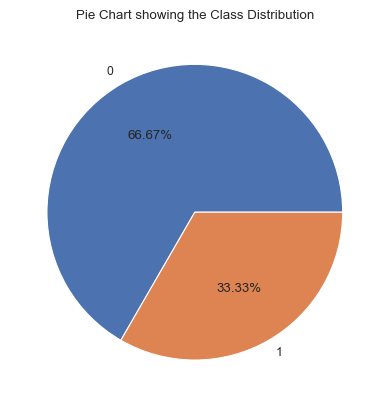

In [22]:
class_counts = y_train_SMOTE.value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%');
plt.title('Pie Chart showing the Class Distribution');

## Preferences
https://builtin.com/data-science/elbow-method#:~:text=The%20elbow%20method%20is%20a%20graphical%20method%20for%20finding%20the,the%20graph%20forms%20an%20elbow.

https://archive.is/fhHGp